In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
img_size=224
batch_size=32

In [32]:
train_gen=ImageDataGenerator(rescale=1./225,validation_split=0.2)

Dataset link in Drive : https://drive.google.com/drive/folders/15NwovkNH37ta-QWGe8wyr4FBXipCPjHB?usp=drive_link

In [33]:
train_geration=train_gen.flow_from_directory(
    '/content/drive/MyDrive/BrainTumor/Train',
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

Found 354 images belonging to 2 classes.


In [34]:
validate_geration=train_gen.flow_from_directory(
    '/content/drive/MyDrive/BrainTumor/Test',
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

Found 71 images belonging to 2 classes.


In [35]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_geration,epochs=8,validation_data=validate_geration,batch_size=batch_size)

Epoch 1/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.5375 - loss: 1.5891 - val_accuracy: 0.5634 - val_loss: 0.6927
Epoch 2/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.5826 - loss: 0.6864 - val_accuracy: 0.4366 - val_loss: 0.7380
Epoch 3/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.6157 - loss: 0.6580 - val_accuracy: 0.5775 - val_loss: 0.6657
Epoch 4/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.7138 - loss: 0.6347 - val_accuracy: 0.5775 - val_loss: 0.7384
Epoch 5/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6985 - loss: 0.5844 - val_accuracy: 0.6761 - val_loss: 0.5937
Epoch 6/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7676 - loss: 0.4789 - val_accuracy: 0.6338 - val_loss: 0.6901
Epoch 7/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8109 - loss: 0.3967 - val_accuracy: 0.6901 - val_loss: 0.7106
Epoch 8/8
11/12 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7950 - loss: 0.4062

In [44]:
model.save('/content/drive/MyDrive/Test.h5')

In [45]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/Test.h5')
print("Model Loaded Successfully")

Model Loaded Successfully


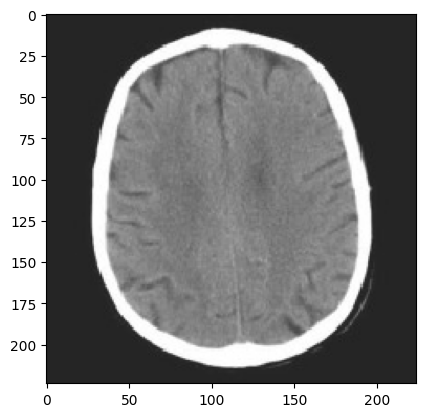

In [46]:
test_image_path='/content/drive/MyDrive/BrainTumor/predict/N1752.jpg'
img=image.load_img(test_image_path,target_size=(img_size,img_size))
plt.imshow(img)
plt.axis()
plt.show()

In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255
prediction=model.predict(img_array)
print(prediction)

In [ ]:
if prediction <=0.5:
  print("No Brain Tumor Detected")
else:
  print("Brain Tumor Detected")